In [7]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


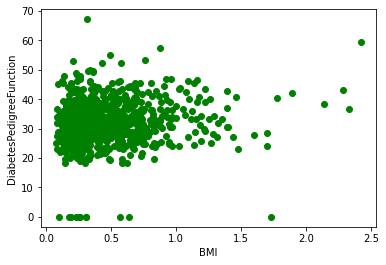

In [9]:
plt.xlabel("BMI")
plt.ylabel("DiabetesPedigreeFunction")
plt.scatter(df.DiabetesPedigreeFunction,df.BMI,color="green")

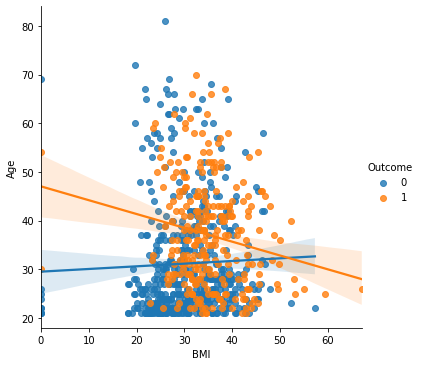

In [20]:
sns.lmplot(data=df, x="BMI", y="Age", hue = "Outcome")

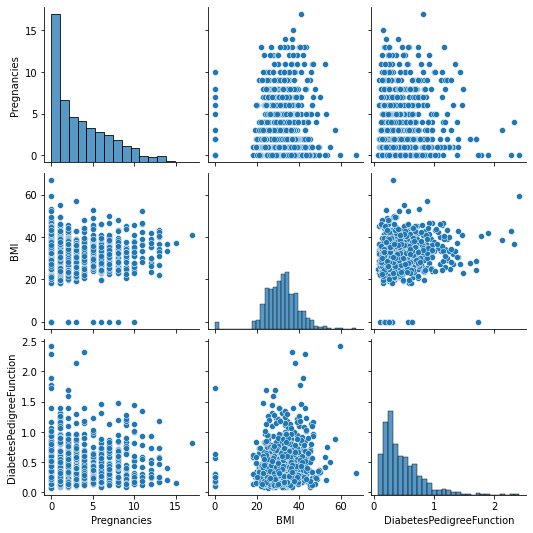

In [12]:
sns.pairplot(df[['Pregnancies', 'BMI', 'DiabetesPedigreeFunction']], diag_kind="hist")

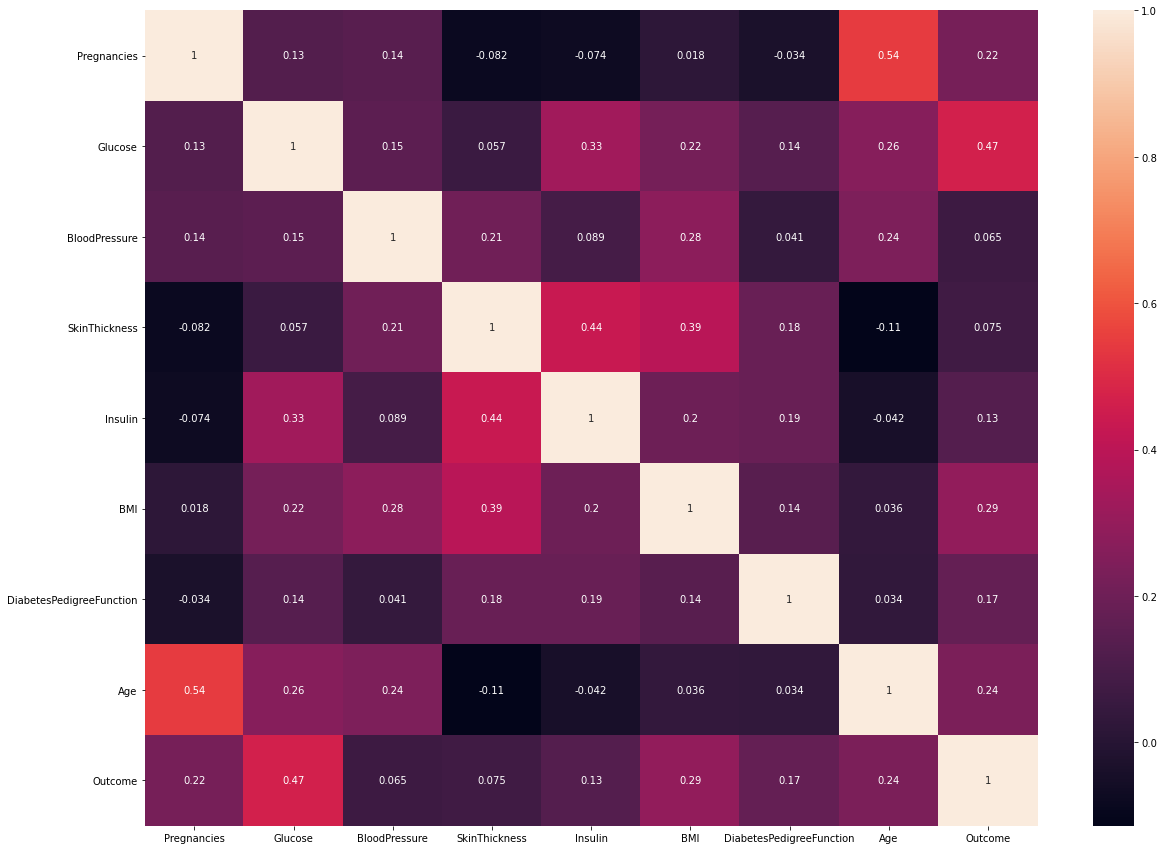

In [49]:
plt.figure(figsize = (20,15))
sns.heatmap(df.corr(), annot = True);

<AxesSubplot:>

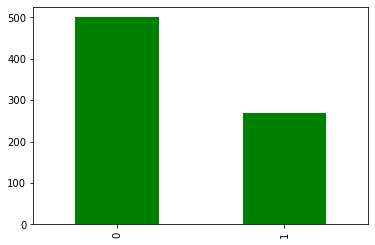

In [24]:
df["Outcome"].value_counts().plot(kind="bar", color="green")

Text(0, 0.5, 'Frequency')

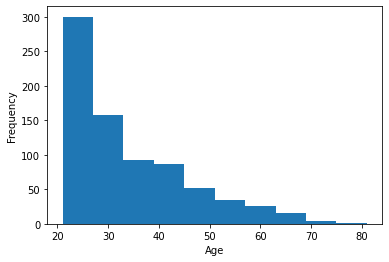

In [45]:
plt.hist(df.Age)
plt.xlabel("Age")
plt.ylabel("Frequency")

<AxesSubplot:ylabel='Outcome'>

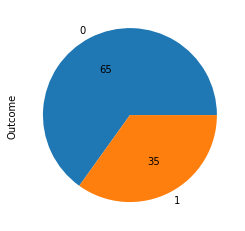

In [48]:
df["Outcome"].value_counts().plot.pie(autopct = "%.0f")

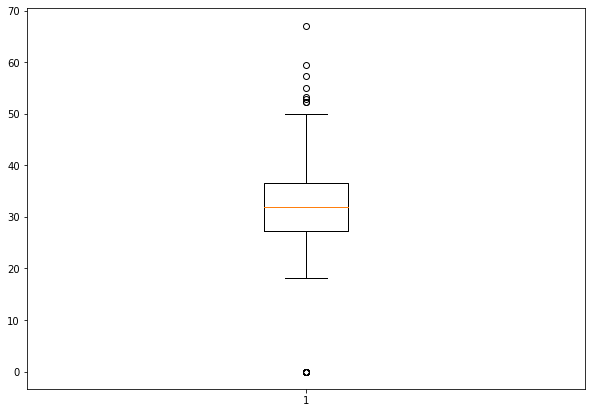

In [67]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot(df.BMI)
plt.show()

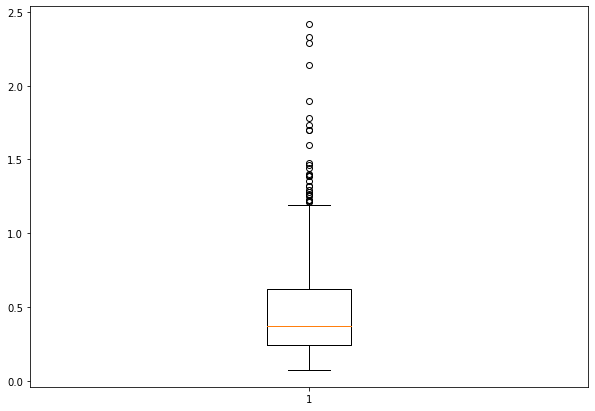

In [68]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot(df.DiabetesPedigreeFunction)
plt.show()

In [52]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [53]:
df.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train,X_test,Y_train,Y_test = train_test_split(df[["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]],df.Outcome,test_size=0.2,random_state=4)

In [56]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
596,0,67,76,0,0,45.3,0.194,46
90,1,80,55,0,0,19.1,0.258,21
734,2,105,75,0,0,23.3,0.560,53
694,2,90,60,0,0,23.5,0.191,25
517,7,125,86,0,0,37.6,0.304,51
...,...,...,...,...,...,...,...,...
360,5,189,64,33,325,31.2,0.583,29
709,2,93,64,32,160,38.0,0.674,23
439,6,107,88,0,0,36.8,0.727,31
174,2,75,64,24,55,29.7,0.370,33


In [57]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
390,1,100,66,29,196,32.0,0.444,42
146,9,57,80,37,0,32.8,0.096,41
136,0,100,70,26,50,30.8,0.597,21
420,1,119,88,41,170,45.3,0.507,26
328,2,102,86,36,120,45.5,0.127,23
...,...,...,...,...,...,...,...,...
374,2,122,52,43,158,36.2,0.816,28
288,4,96,56,17,49,20.8,0.340,26
282,7,133,88,15,155,32.4,0.262,37
754,8,154,78,32,0,32.4,0.443,45


In [59]:
from sklearn.linear_model import LogisticRegression

In [61]:
model = LogisticRegression()
model.fit(X_train,Y_train)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [62]:
model.predict(X_test)

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1],
      dtype=int64)

In [63]:
model.score(X_test,Y_test)

0.8051948051948052

In [64]:
model.predict_proba(X_test)

array([[0.84313265, 0.15686735],
       [0.91735477, 0.08264523],
       [0.90125321, 0.09874679],
       [0.61646153, 0.38353847],
       [0.78071055, 0.21928945],
       [0.17451987, 0.82548013],
       [0.45672856, 0.54327144],
       [0.57116123, 0.42883877],
       [0.0834562 , 0.9165438 ],
       [0.79820778, 0.20179222],
       [0.49923929, 0.50076071],
       [0.94552761, 0.05447239],
       [0.80527691, 0.19472309],
       [0.9461323 , 0.0538677 ],
       [0.87911328, 0.12088672],
       [0.34439335, 0.65560665],
       [0.11935644, 0.88064356],
       [0.05377455, 0.94622545],
       [0.96451831, 0.03548169],
       [0.9542007 , 0.0457993 ],
       [0.88760857, 0.11239143],
       [0.28282494, 0.71717506],
       [0.73797137, 0.26202863],
       [0.13689911, 0.86310089],
       [0.81402517, 0.18597483],
       [0.70409791, 0.29590209],
       [0.89509704, 0.10490296],
       [0.31818434, 0.68181566],
       [0.75011504, 0.24988496],
       [0.80375023, 0.19624977],
       [0.

In [65]:
y_predicted = model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,y_predicted)
cm

array([[89, 13],
       [17, 35]], dtype=int64)

<AxesSubplot:>

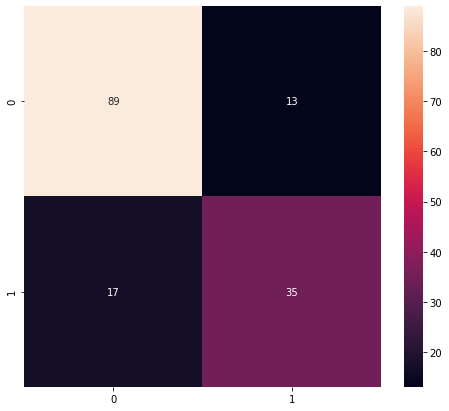

In [66]:
plt.figure(figsize = (8,7))
sns.heatmap(cm,annot=True)

In [69]:
from sklearn import tree
mod = tree.DecisionTreeClassifier()
mod.fit(X_train,Y_train)

DecisionTreeClassifier()

In [70]:
mod.predict(X_test)

array([1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1],
      dtype=int64)

In [71]:
mod.score(X_test,Y_test)

0.7077922077922078

In [72]:
pip install autoviz

Note: you may need to restart the kernel to use updated packages.


In [73]:
from autoviz.AutoViz_Class import AutoViz_Class

AV = AutoViz_Class()

Imported AutoViz_Class version: 0.0.81. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 saves plots in your local machine under AutoViz_Plots directory and does not display charts.


Shape of your Data Set: (768, 9)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  2
    Number of Integer-Categorical Columns =  6
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  1
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    9 Predictors classified...
        This does not include the Target column(s)
        No variables removed since no ID or low-information variables found in data set
Number of All Scatter Plots = 3


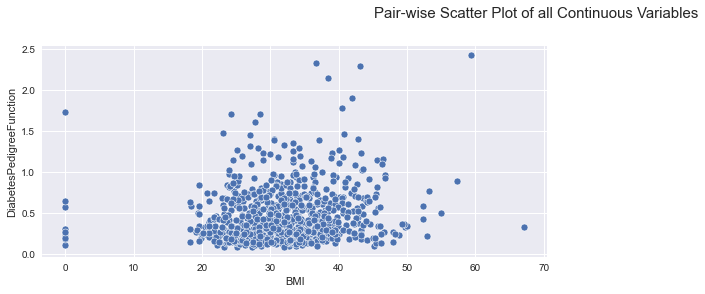

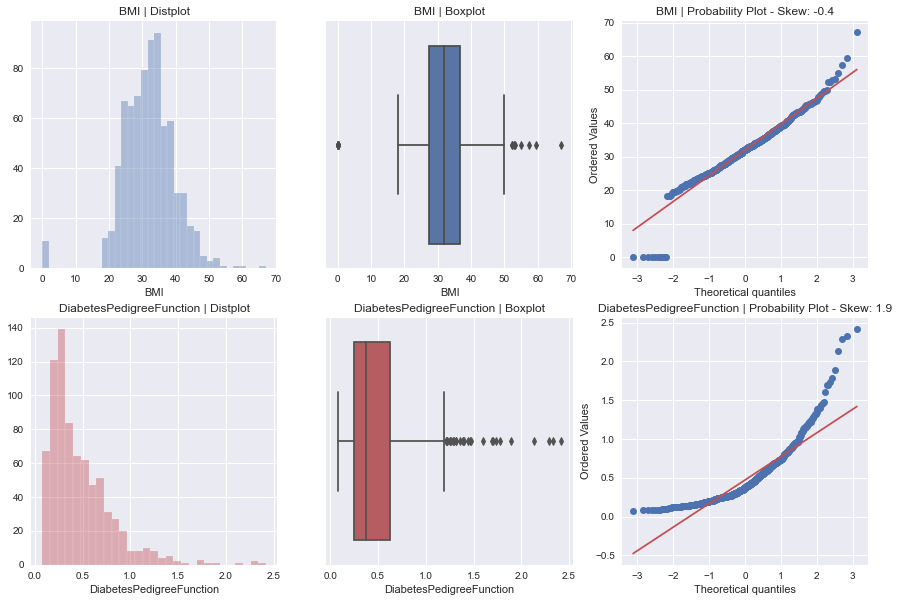

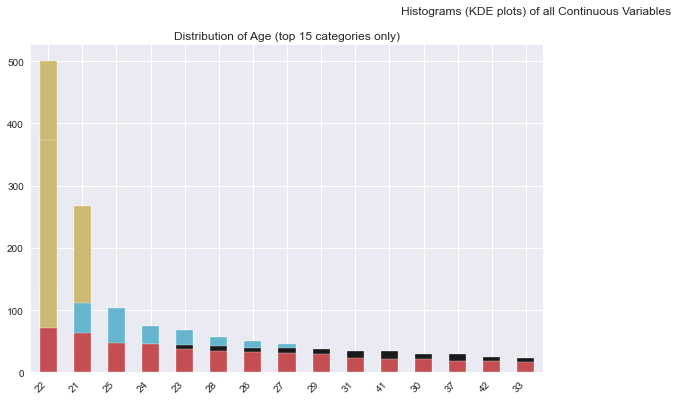

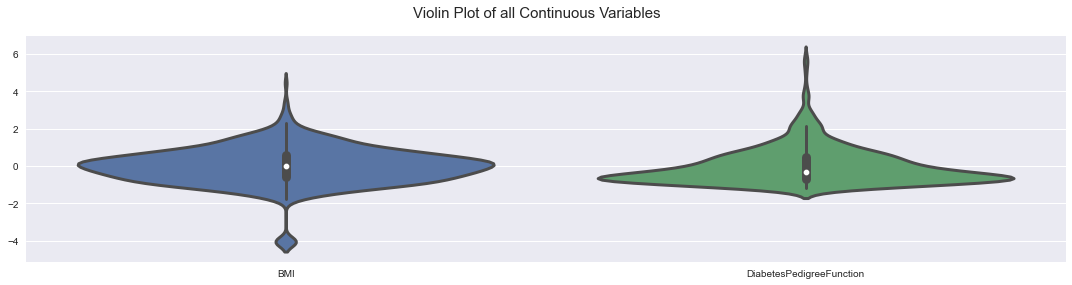

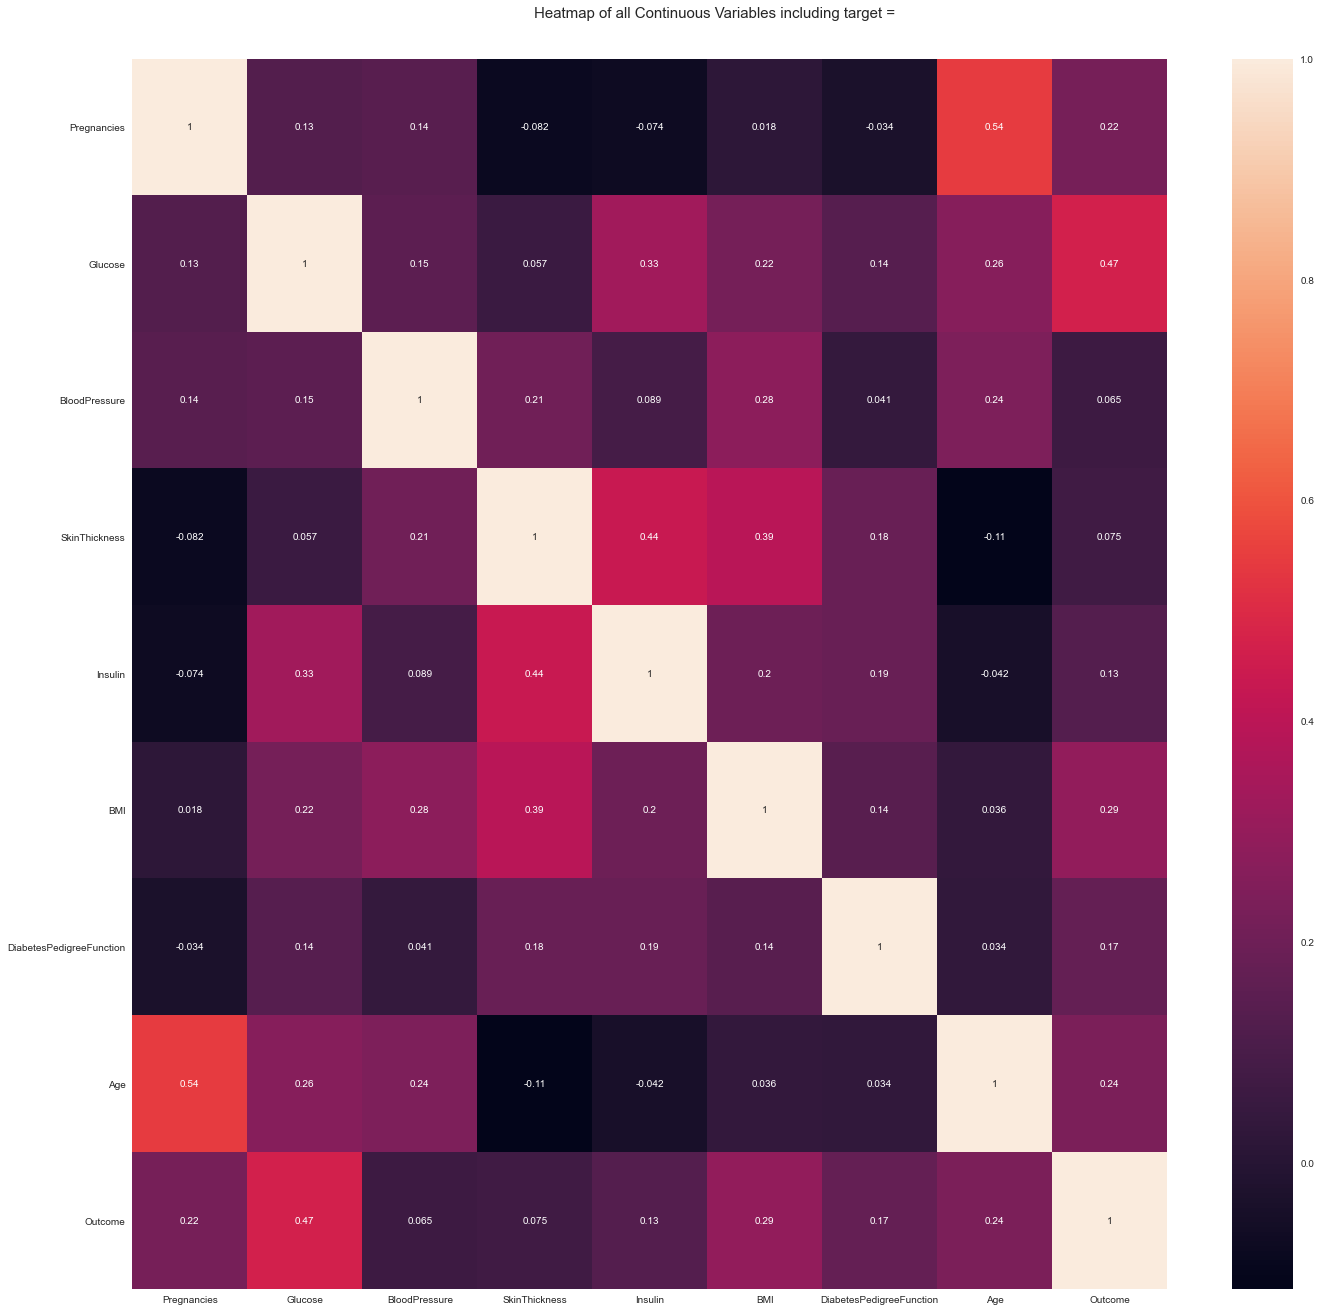

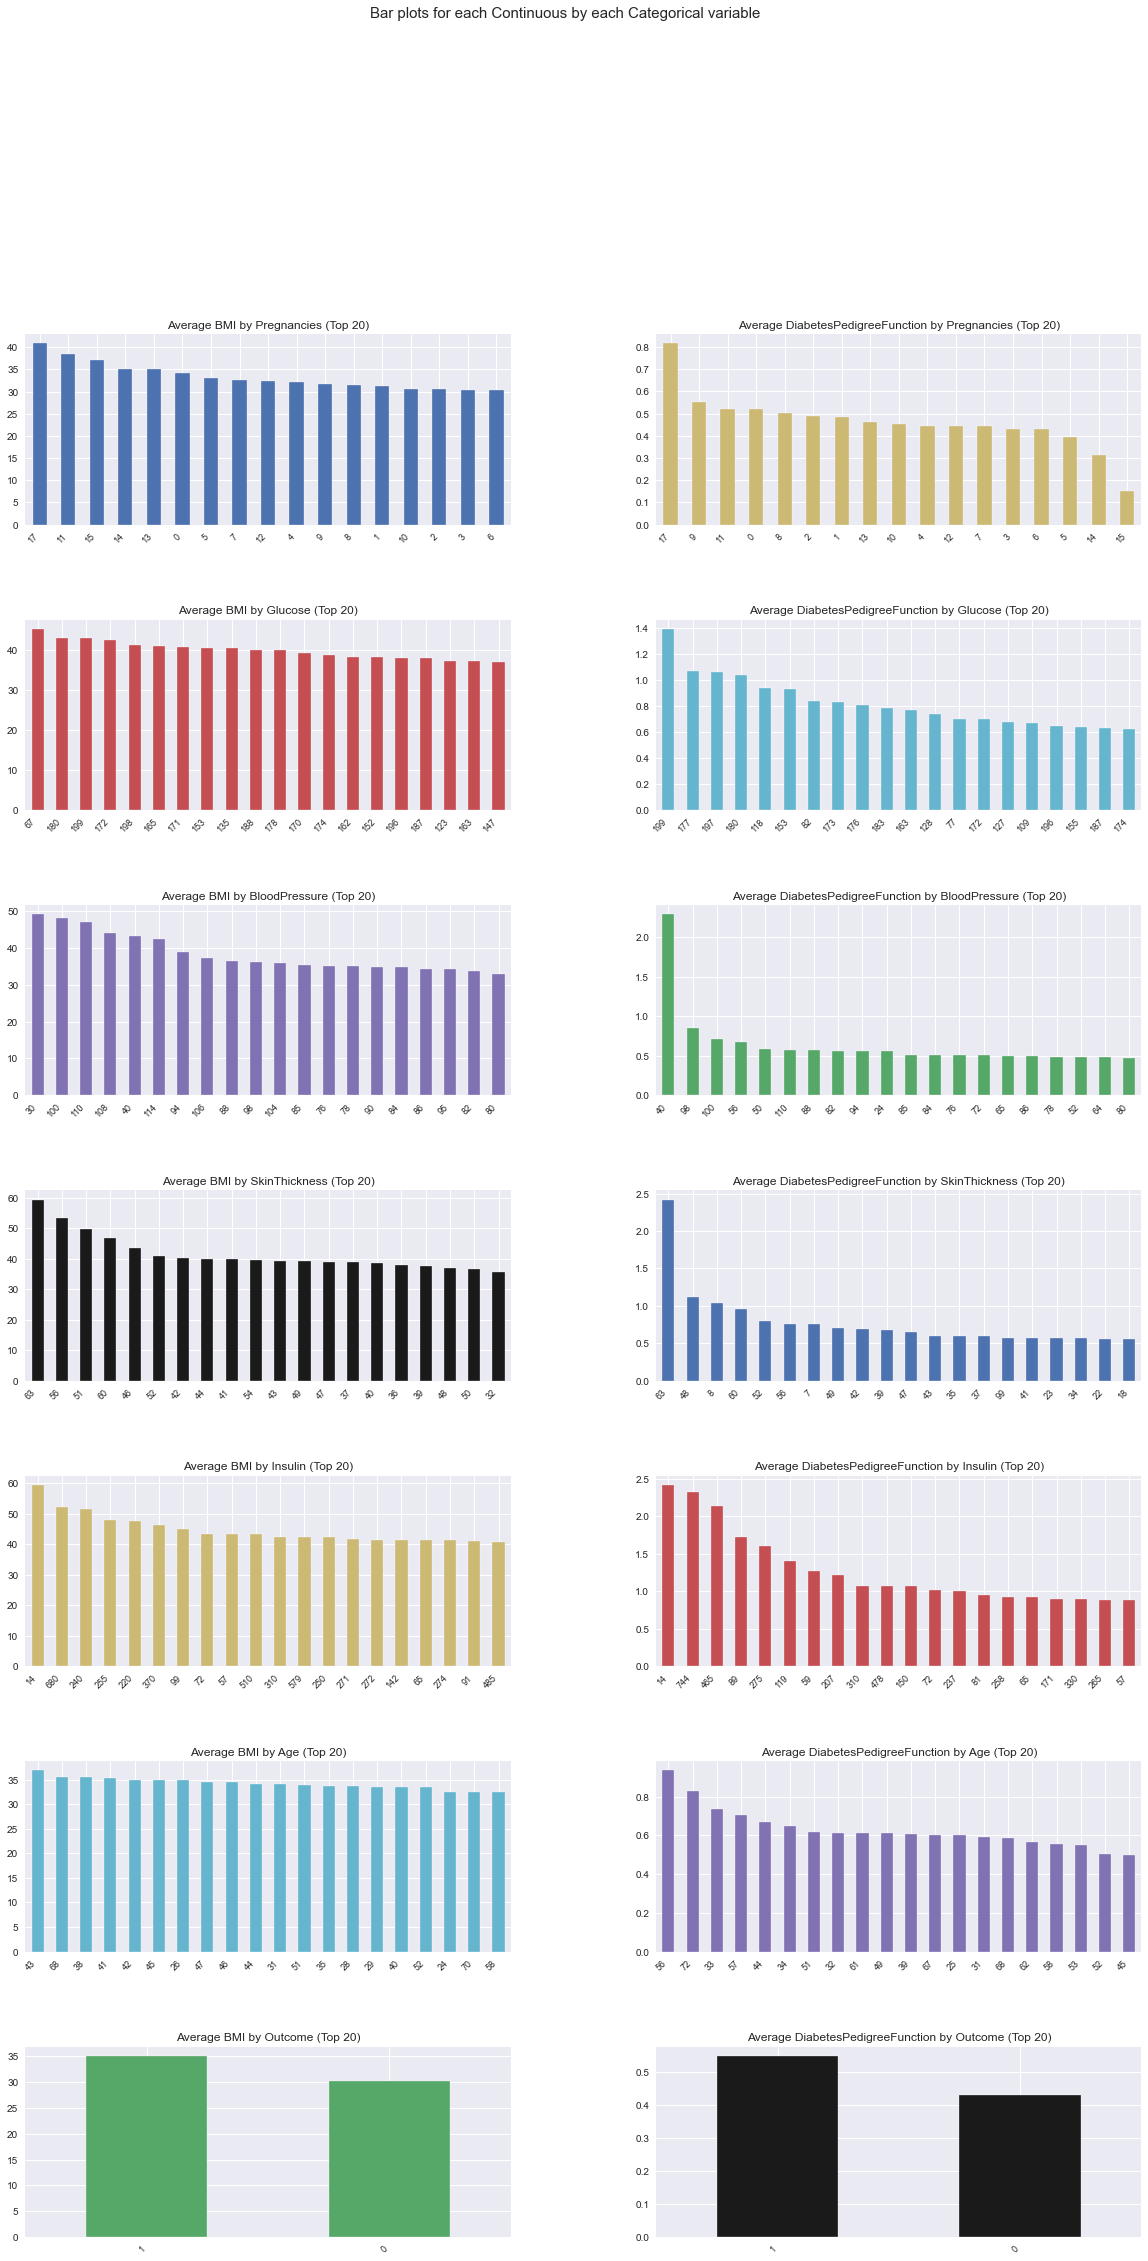

Time to run AutoViz (in seconds) = 5.512

 ###################### VISUALIZATION Completed ########################


In [74]:
filename = "diabetes.csv"
sep = ","
dft = AV.AutoViz(
    filename,
    sep=",",
    depVar="",
    dfte=None,
    header=0,
    verbose=0,
    lowess=False,
    chart_format="svg",
    max_rows_analyzed=150000,
    max_cols_analyzed=30,
)